# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yvett\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

Python-dotenv could not parse statement starting at line 11


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin AND Bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
    language = "en",
    sort_by="relevancy"
)

In [6]:
# Define function to create dataframes from news api
def create_df(news):
    articles = []
    for article in news:
        try:
            text = article['content']
            articles.append({
                'text': text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Create dataframes for each topic
btc_df = create_df(btc_news['articles'])
btc_df.dropna(inplace=True)

eth_df = create_df(eth_news['articles'])
eth_df.dropna(inplace=True)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in btc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(text_sent)

btc_df = btc_df.join(btc_sentiment_df)

btc_df.columns = ['Article','Compound','Positive','Neutral','Negative']

btc_df.head()

,Article,Compound,Positive,Neutral,Negative
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.718,0.000
1,El Salvador has become the first country in th...,0.1280,0.043,0.957,0.000
2,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.831,0.000
3,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.705,0.184
4,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.940,0.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in eth_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(text_sent)

eth_df = eth_df.join(eth_sentiment_df)

eth_df.columns = ['Article','Compound','Positive','Neutral','Negative']

eth_df.head()

,Article,Compound,Positive,Neutral,Negative
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,1.000,0.000
1,It wasn't long ago that your average person ha...,-0.2960,0.000,0.939,0.061
2,This article was translated from our Spanish e...,-0.3400,0.000,0.934,0.066
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.849,0.041
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.806,0.000


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.104660,0.068550,0.895400,0.036000
std,0.377301,0.069756,0.084808,0.053666
min,-0.612400,0.000000,0.705000,0.000000
25%,-0.050575,0.000000,0.840250,0.000000
50%,0.128000,0.060500,0.923500,0.000000
75%,0.289900,0.105500,0.955500,0.059000
max,0.840200,0.282000,1.000000,0.184000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.063475,0.040500,0.934350,0.025150
std,0.356132,0.058708,0.053135,0.032347
min,-0.381800,0.000000,0.806000,0.000000
25%,-0.273200,0.000000,0.920000,0.000000
50%,0.000000,0.000000,0.936500,0.000000
75%,0.361200,0.074750,0.961000,0.060250
max,0.771700,0.194000,1.000000,0.080000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score.

Q: Which coin had the highest compound score?

A: A: Bitcoin had the highest mean compound score.

Q. Which coin had the highest positive score?

A: A: Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'today', 'week', 'also', 'el', 'salvador',}

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
   
    # Create a tokenized list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word 
    
        # Convert the words to lowercase
    words_lc = [word.lower() for word in words]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    words_sw = [word for word in words_lc if word not in sw]
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words_sw]
       
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = [tokenizer(text) for text in btc_df['Article']]
btc_df

,Article,Compound,Positive,Neutral,Negative,Tokens
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.718,0.000,"[el, salvador, president, nayib, bukele, made,..."
1,El Salvador has become the first country in th...,0.1280,0.043,0.957,0.000,"[el, salvador, become, first, country, world, ..."
2,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.831,0.000,"[clean, energy, seemselon, musk, tesla, caused..."
3,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.705,0.184,"[filed, underthe, supply, chain, attack, reach..."
4,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.940,0.000,"[image, captionthe, move, mean, bitcoin, accep..."
5,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.893,0.000,"[several, crypto, fan, descended, miami, flori..."
6,"By Mary-Ann RussonBusiness reporter, BBC News\...",0.3400,0.070,0.930,0.000,"[maryann, russonbusiness, reporter, bbc, newsi..."
7,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.857,0.143,"[image, copyrightgetty, imagesthe, gang, behin..."
8,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.957,0.000,"[san, salvador, june, reuters, el, salvador, r..."
9,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.838,0.057,"[london, june, reuters, el, salvador, determin..."


In [16]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = [tokenizer(text) for text in eth_df['Article']]
eth_df

,Article,Compound,Positive,Neutral,Negative,Tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,1.000,0.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,It wasn't long ago that your average person ha...,-0.2960,0.000,0.939,0.061,"[wasnt, long, ago, average, person, clue, nft,..."
2,This article was translated from our Spanish e...,-0.3400,0.000,0.934,0.066,"[article, translated, spanish, edition, using,..."
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.849,0.041,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.806,0.000,"[ether, holder, staked, billion, worth, crypto..."
5,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.850,0.000,"[ether, cryptocurrency, ethereum, networkphoto..."
6,Major upgrades to the ethereum network could h...,0.4019,0.080,0.920,0.000,"[major, upgrade, ethereum, network, could, hel..."
7,"Sir Tim Berners-Lee, credited as the inventor ...",0.3612,0.065,0.935,0.000,"[sir, tim, bernerslee, credited, inventor, wor..."
8,"Two Ethereum-based protocols, Keep Network and...",0.0000,0.000,1.000,0.000,"[two, ethereumbased, protocol, keep, network, ..."
9,You’ve likely seen the headlines surrounding t...,0.4939,0.086,0.914,0.000,"[youve, likely, seen, headline, surrounding, p..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('el', 'salvador'), 6),
 (('bitcoin', 'legal'), 6),
 (('legal', 'tender'), 5),
 (('june', 'reuters'), 5),
 (('reuters', 'el'), 4),
 (('central', 'american'), 3),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('salvador', 'become'), 2),
 (('become', 'first'), 2)]

In [19]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('world', 'biggest'), 8),
 (('previous', 'closebitcoin'), 7),
 (('closebitcoin', 'world'), 7),
 (('biggest', 'bestknown'), 7),
 (('bestknown', 'cryptocurrency'), 7),
 (('cryptocurrency', 'ethereum'), 5),
 (('cryptocurrency', 'char'), 5),
 (('char', 'bitcoin'), 5),
 (('adding', 'previous'), 5),
 (('gmt', 'sunday'), 4)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(btc_df["Article"])
processed = tokenizer(big_string)
token_count(processed)

[('char', 20), ('bitcoin', 17), ('salvador', 9)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 19), ('cryptocurrency', 15), ('world', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

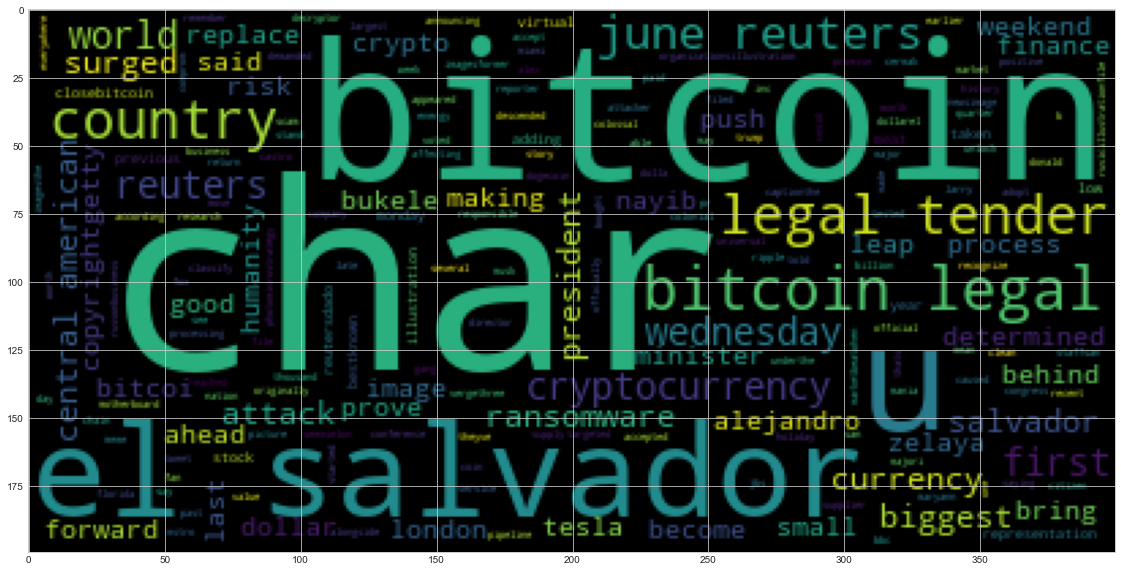

In [24]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

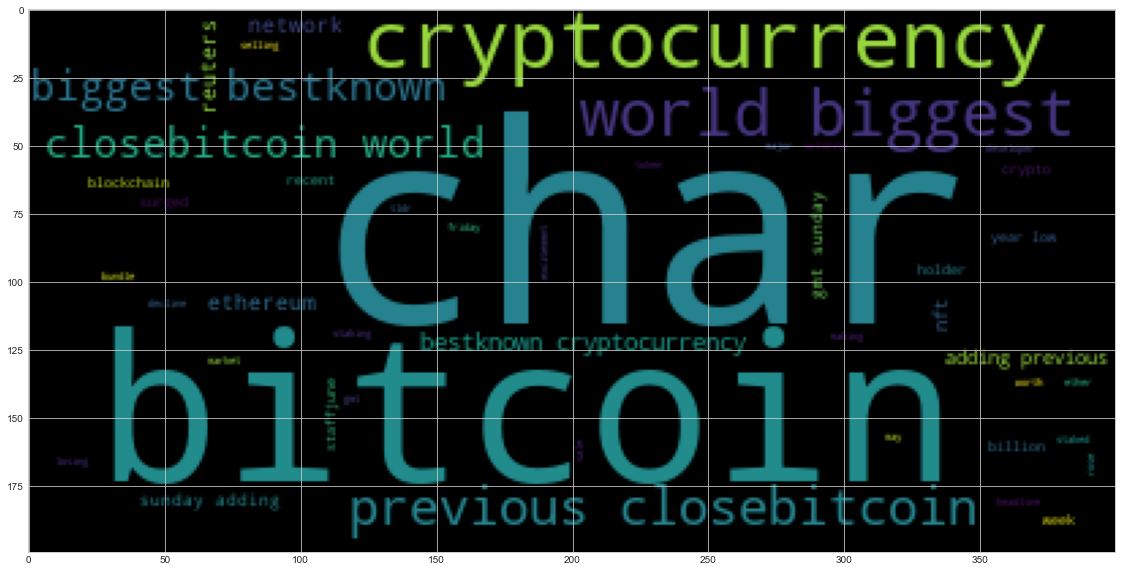

In [25]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df['Article'])
btc_text

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars] El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars] It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvado

In [30]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent')

In [32]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
El Salvador GPE
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
Alex Castro PERSON
Verge ORG
Three days DATE
the holiday weekend DATE
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
$70m MONEY
£50.5m MONEY
Bitcoin PERSON
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Bitcoin PERSON
May 20, 2021 DATE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
the Central American LOC
JBS ORG
up to one quar

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df['Article'])
eth_text

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars] It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars] This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars] Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars] Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds a

In [34]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(doc, style='ent')

In [36]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
Yuriko Nakao PERSON
Friday DATE
more than $13 billion MONEY
2.0 CARDINAL
Photothek/Getty Images PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Two CARDINAL
Keep Network ORG
Last week DATE
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
recent months DATE
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
2,853.31 MONEY
Bitcoin PERSON
30.8% PERCENT
year DATE
27,734 MONEY
Jan. DATE
Bitcoin PERSON
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Saturday DATE
2,131.11 MONEY
Bitcoin PERSON
45.7% PERCENT
2021 DATE
6 MONEY
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
Bitcoin PERSON
9.83 % PERCENT
22:05 CARDINAL
GMT ORG
Sunday DATE
3,492.71 MONEY
Bitcoin PERSON
40.7% PERCENT
year DATE
27 MONEY
Reuters ORG
June 25 DATE
Reuters ORG
8.51%

---